## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Fri Jul 19 10:46:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 30.1/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="M4cY1k1D8M69rcFs6nBo")
project = rf.workspace("motionorientation").project("orientation-cb9id")
version = project.version(3)
dataset = version.download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to orientation-3 in yolov8:: 100%|██████████| 1712/1712 [00:00<00:00, 8038.62it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=150 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.60 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/orientation-3/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=

In [ ]:
!ls {HOME}/runs/detect/train2/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1721387578.014b8dade02f.8116.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch4230.jpg  weights
P_curve.png					    train_batch4231.jpg
PR_curve.png					    train_batch4232.jpg


/content


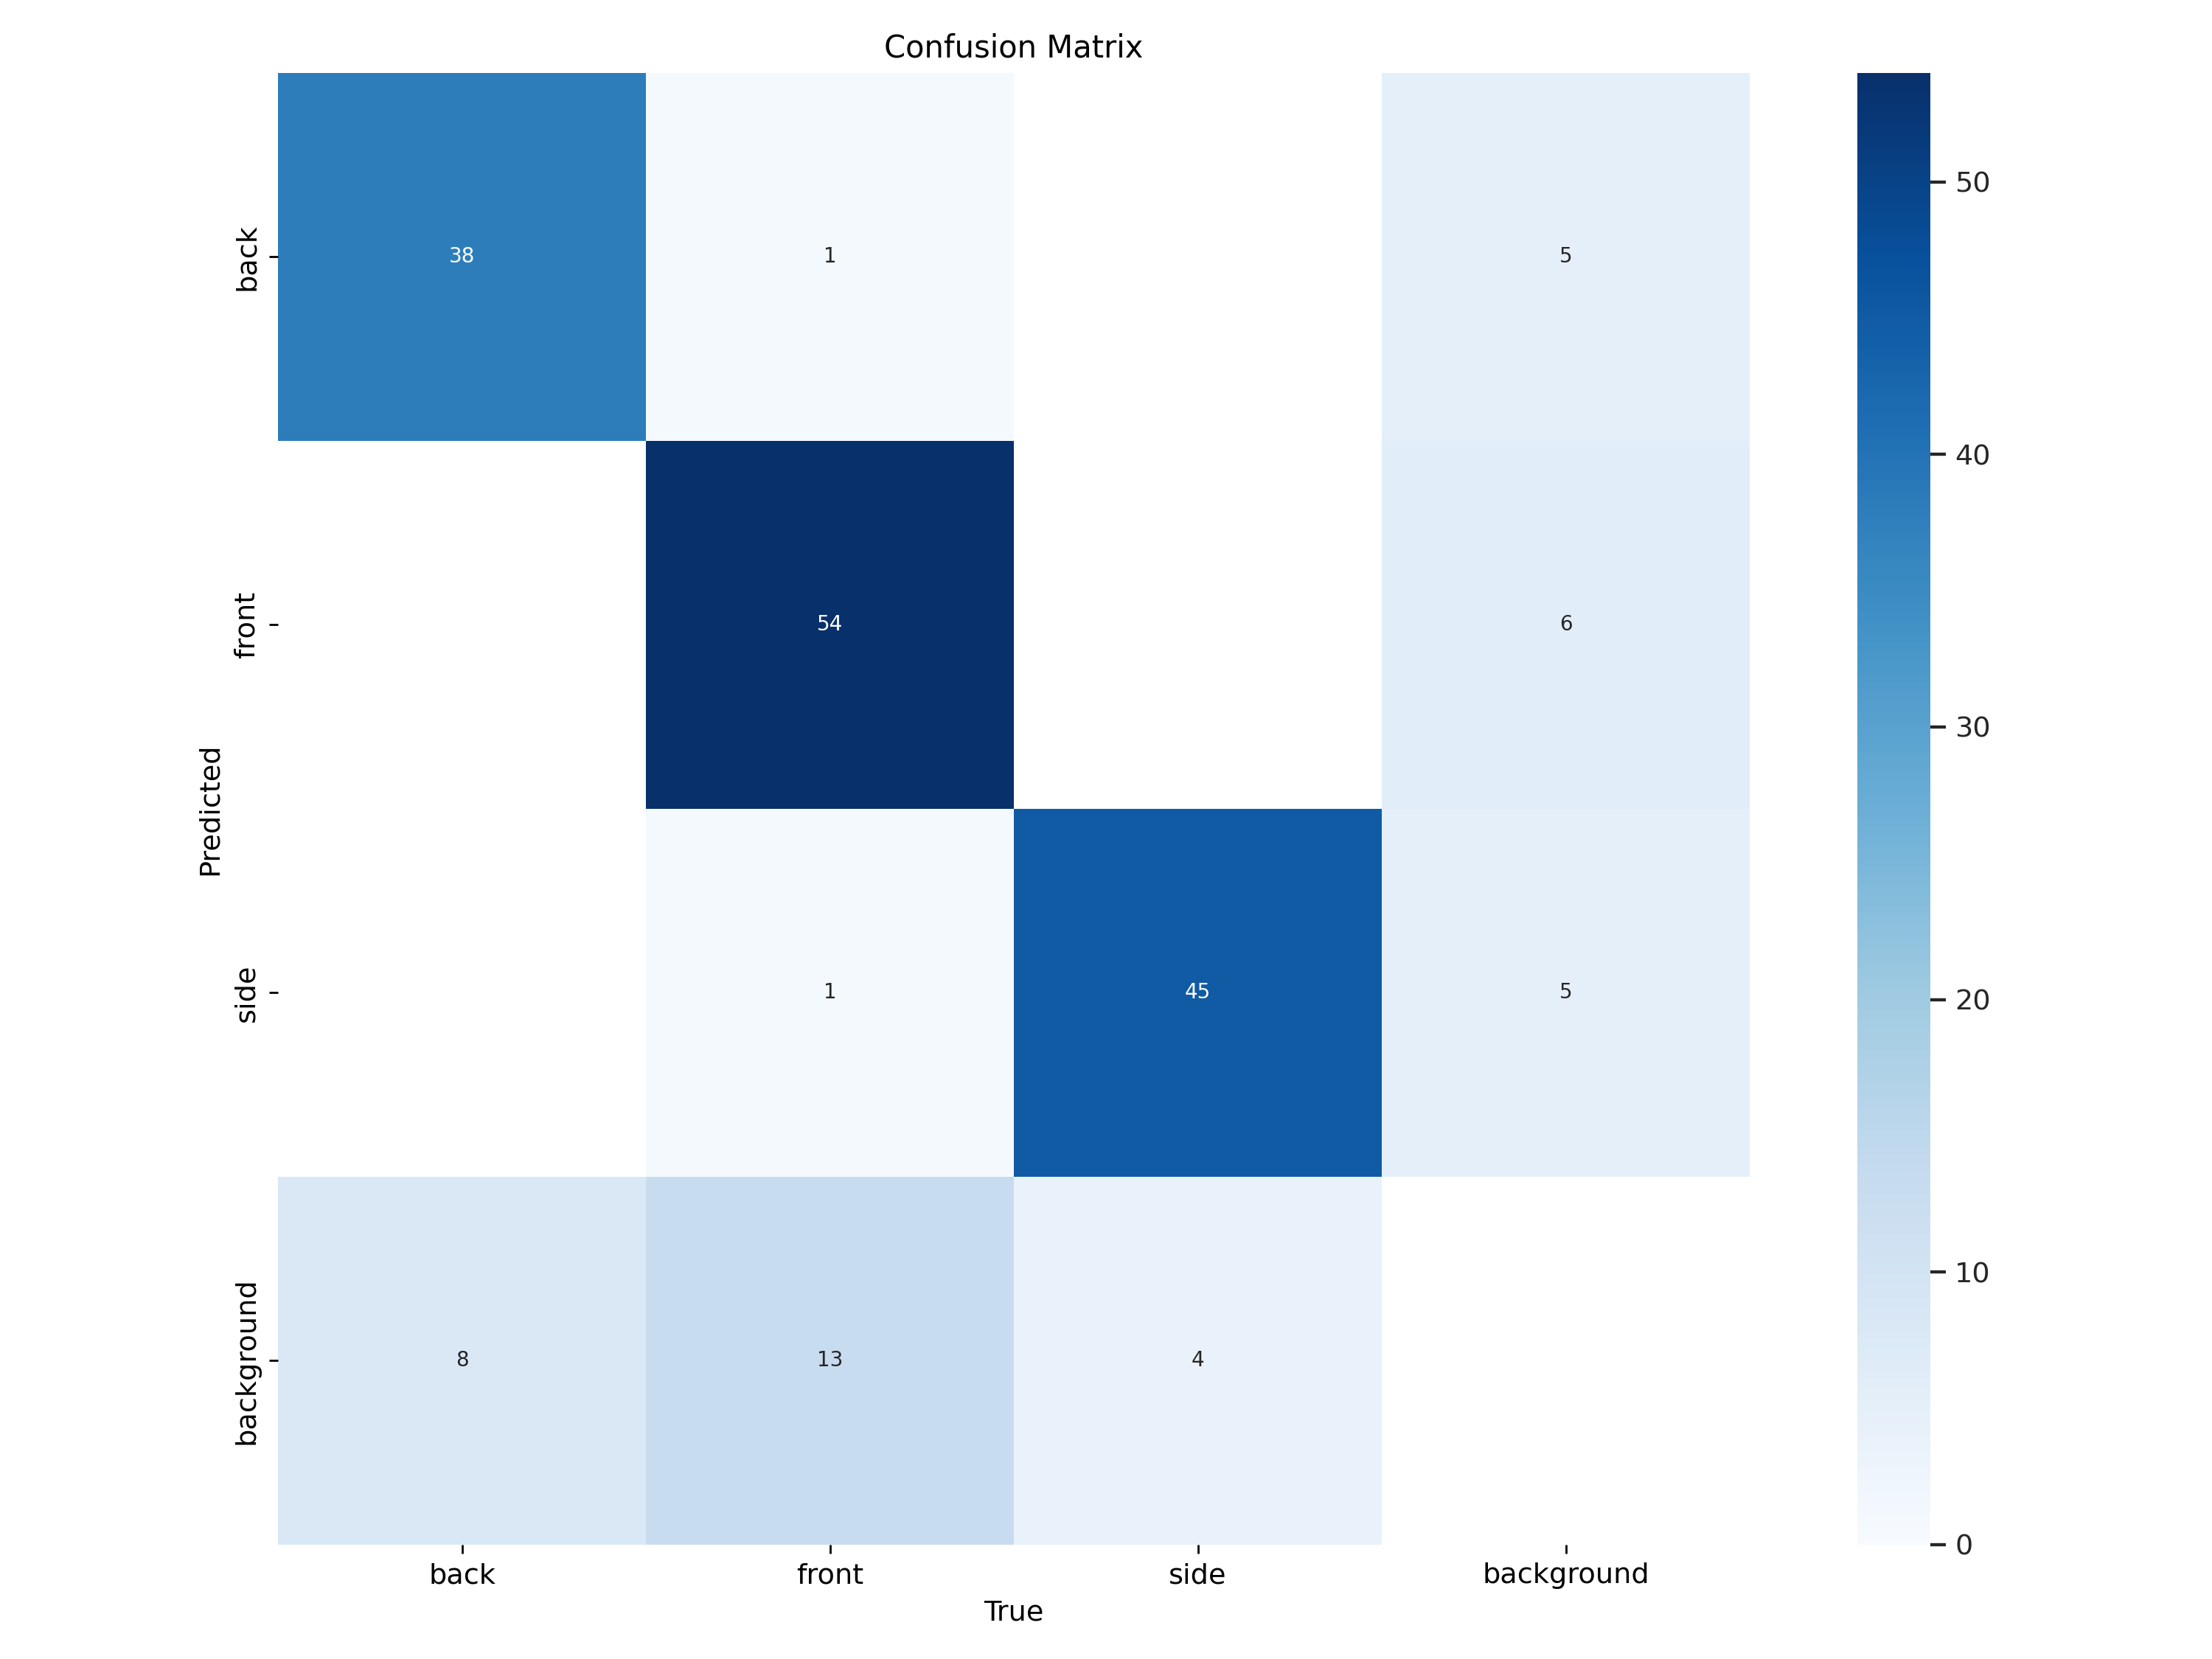

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


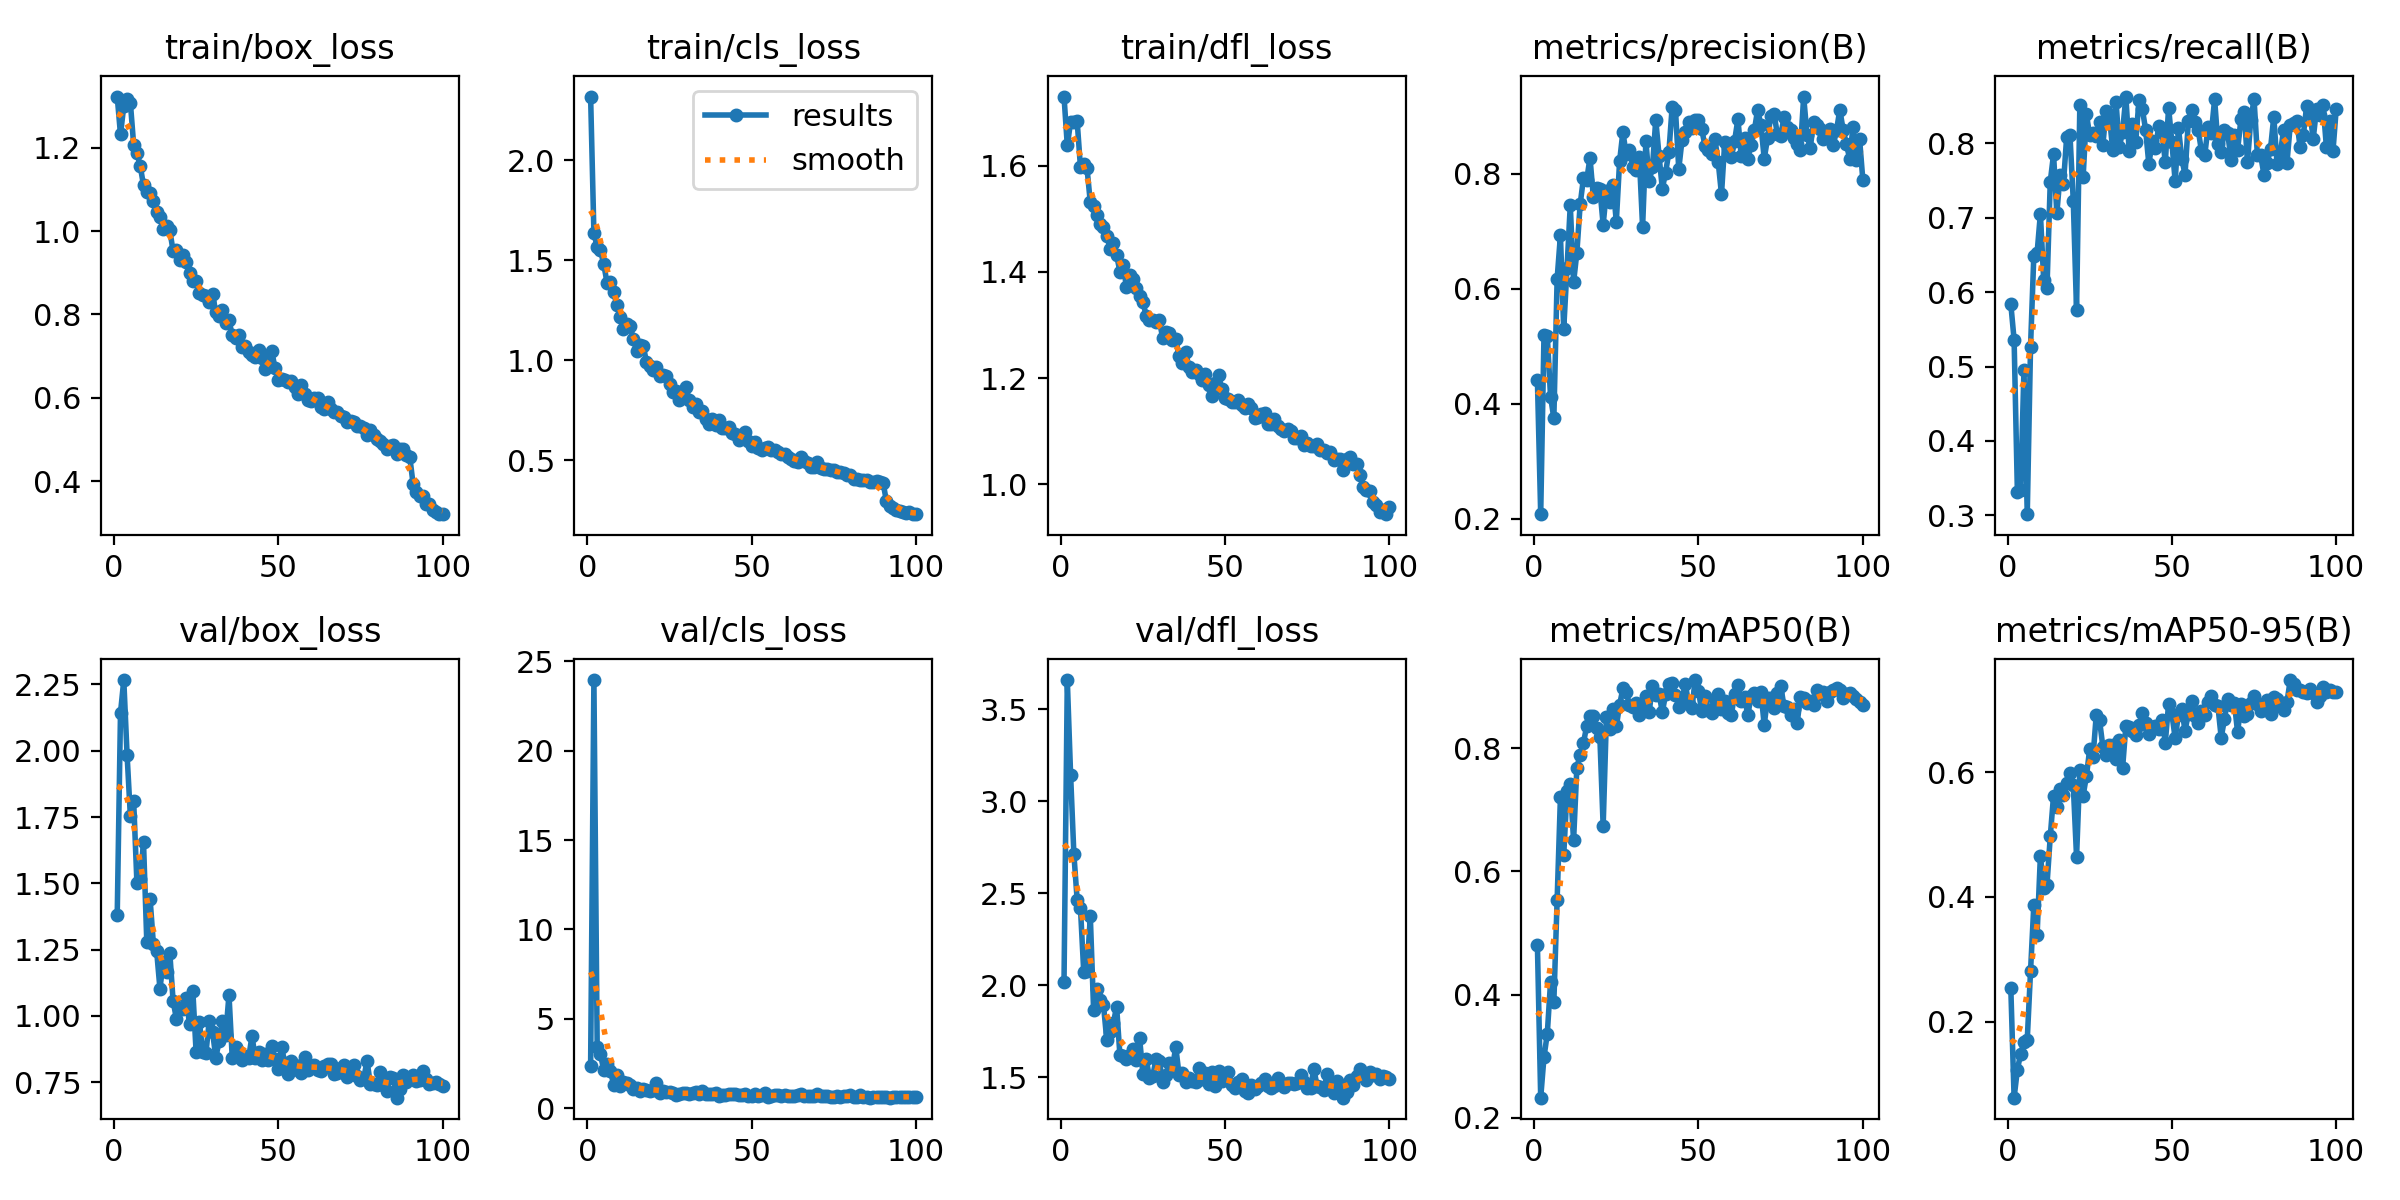

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


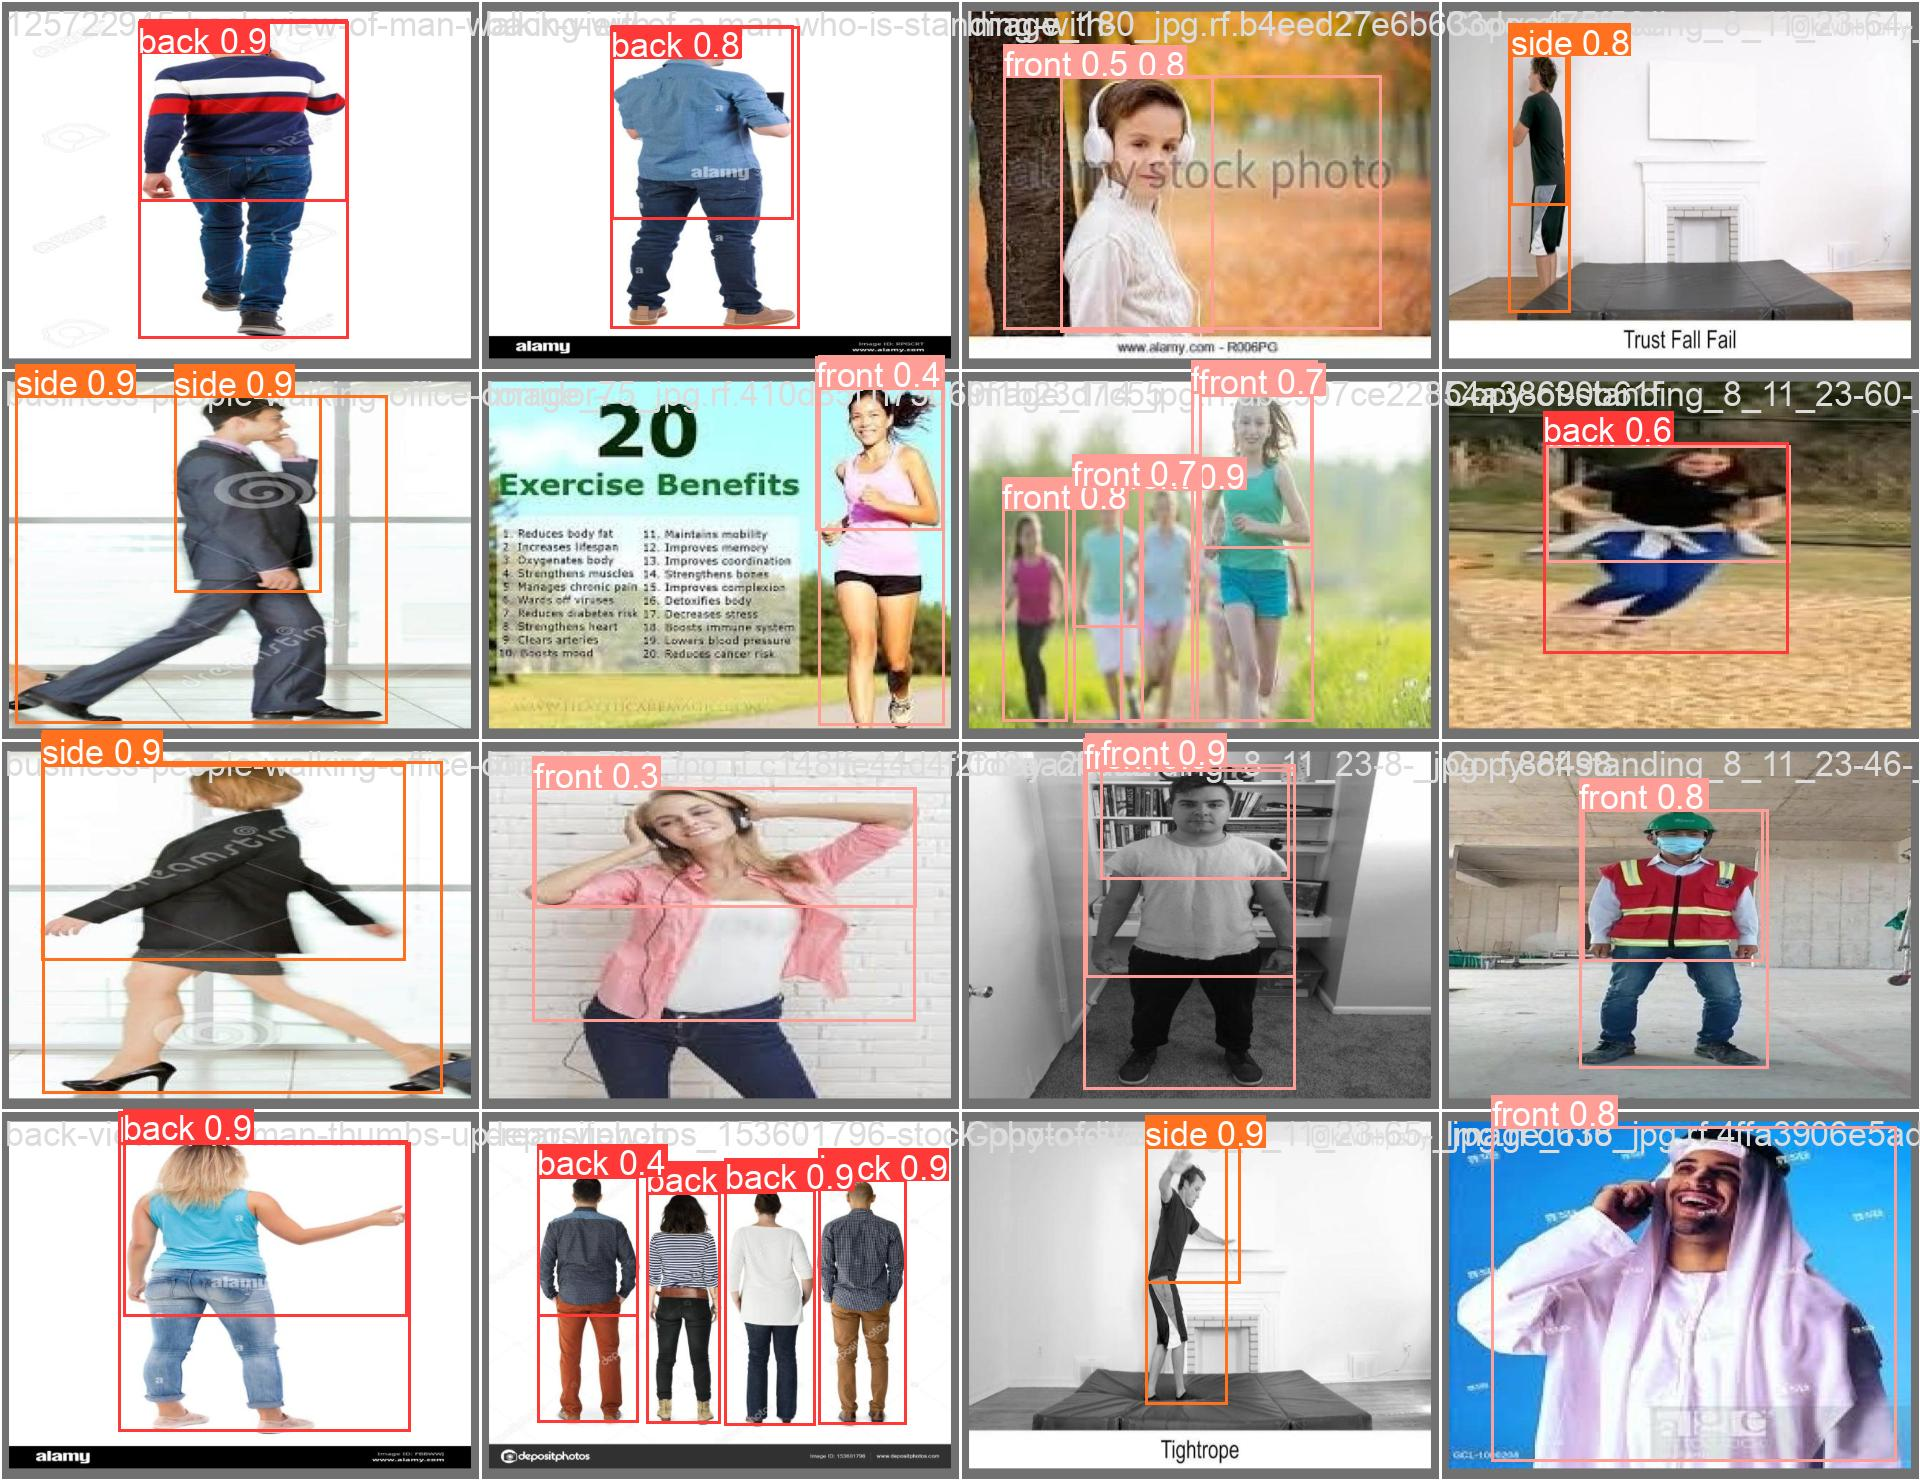

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/orientation-3/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100% 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:03<00:00,  1.31it/s]
                   all         73        164      0.887      0.829      0.894      0.748
                  back         73         46      0.882      0.816      0.868      0.761
                 front         73         69      0.914      0.774      0.865      0.644
                  side         73         49      0.863      0.898       0.95      0.839
Speed: 3.3ms preprocess, 11.9ms inference, 0.2ms loss, 28.9ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/35 /content/datasets/orientation-3/test/images/1000_F_118826353_kTwyOubWVxaR9s3KRLoksJjcaH32x0KY_jpg.rf.7b5edaac8f2f6d8b166bf7820f23ceaa.jpg: 608x800 2 backs, 67.9ms
image 2/35 /content/datasets/orientation-3/test/images/15649753245_4fe3ed7f02_z_jpg.rf.9dcb07b308ee5a37ebb4f75f7893b2b4.jpg: 608x800 5 fronts, 18.6ms
image 3/35 /content/datasets/orientation-3/test/images/16094431-une-jeune-fille-aux-cheveux-longs-dans-une-chemise-bleue-et-un-short-en-jean-vaut-la-peine-de-tourner-le-dos-a-la-camera-et-de-garder-les-mains-sur-les-hanches-photo_jpg.rf.a48e1b34ff21c4c50d674f680c4792e3.jpg: 608x800 1 back, 18.5ms
image 4/35 /content/datasets/orientation-3/test/images/17184967078_800d85ca65_z_jpg.rf.9b9c2a4a7d98eaa15990b822971b8334.jpg: 608x800 2 fronts, 18.5ms
image 5/35 /content/datasets/orientation-3/test/i

**NOTE:** Let's take a look at few results.

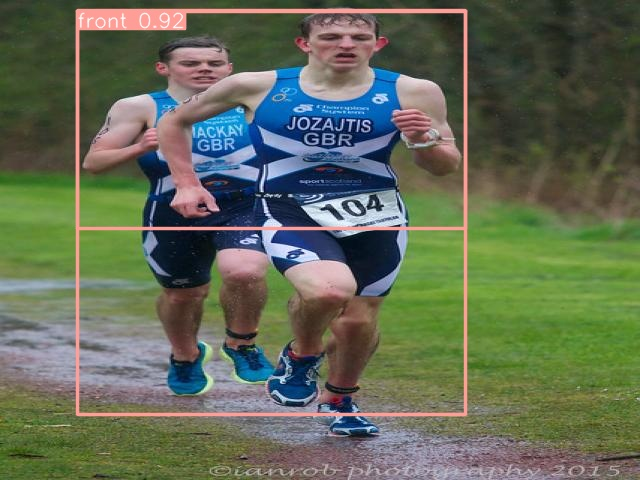

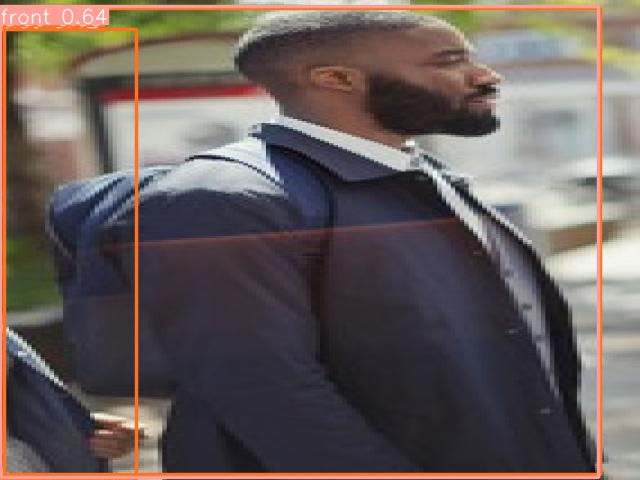

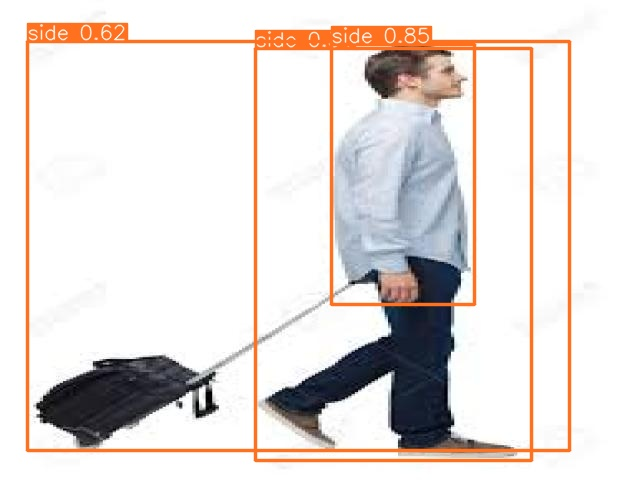

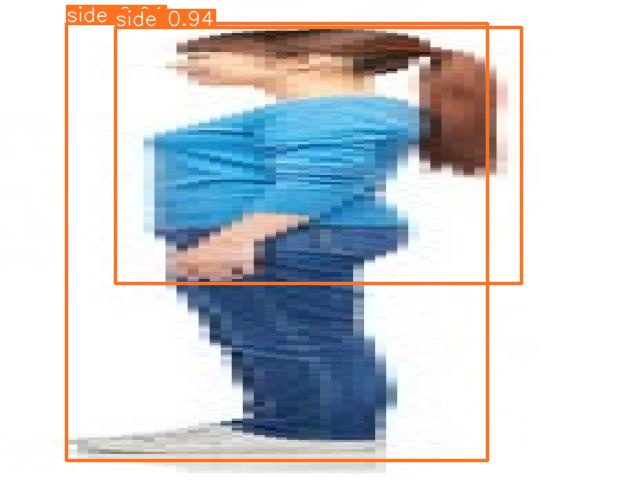

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:4]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

In [ ]:
import matplotlib.pyplot as plt

# Assuming training_loss and validation_loss are lists of loss values per epoch
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.savefig('loss_plot.png')
plt.show()

# Save loss values
with open('training_loss.txt', 'w') as f:
    for loss in training_loss:
        f.write(f"{loss}\\n")

with open('validation_loss.txt', 'w') as f:
    for loss in validation_loss:
        f.write(f"{loss}\\n")


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_true and y_pred are the true labels and predicted labels respectively
cm = confusion_matrix(y_true, y_pred, labels=list(model.config.id2label.keys()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(model.config.id2label.values()))

plt.figure(figsize=(12, 12))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Save the confusion matrix
import numpy as np
np.savetxt('confusion_matrix.csv', cm, delimiter=',', fmt='%d')


In [ ]:
# Save the model
model_save_path = 'best_yolov8_model.pth'
torch.save(model.state_dict(), model_save_path)

# Save model to files
from google.colab import files
files.download(model_save_path)


In [ ]:
import shutil
import os

# Define the directory paths
results_dir = 'path_to_results_directory'
weights_dir = 'path_to_weights_directory'
output_zip = 'output_directory.zip'

# Create a zip file of the directory
shutil.make_archive('results_and_weights', 'zip', results_dir)
shutil.make_archive('results_and_weights', 'zip', weights_dir)

# Save the zip file to a directory
output_path = os.path.join('output_directory_path', output_zip)
shutil.move('results_and_weights.zip', output_path)

# Download the zip file (if using Google Colab)
from google.colab import files
files.download(output_path)
